In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("household_daily.csv",header=0,infer_datetime_format=True,parse_dates=['occurtime'],index_col=['occurtime'])


In [ ]:
df.head()

,power
occurtime,
2020-12-10,21980.39
2020-12-11,16564.25
2020-12-12,20359.33
2020-12-13,21630.15
2020-12-14,22984.32


In [ ]:
df.shape

(71, 1)

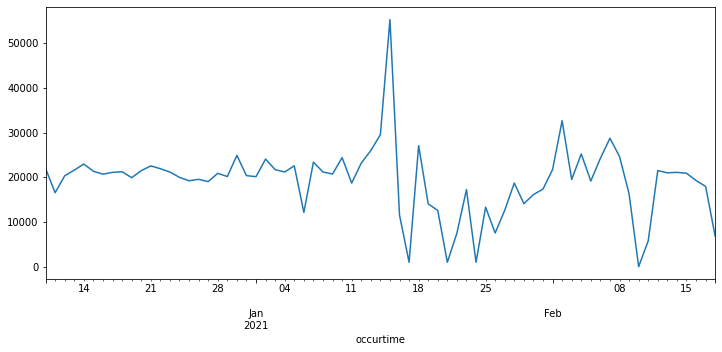

In [ ]:
df['power'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print("1. ADF: ",dftest[0])
  print("2. P_val : ",dftest[1])
  print("3. no. of lags : ",dftest[2])
  print("4. no. of observations used for ADF regression and critical vals calc : ",dftest[3])
  print("5. critical vals : ")
  for key,val in dftest[4].items():
    print("\t",key,": ",val)


In [ ]:
ad_test(df['power'])

1. ADF:  -3.0349579163791107
2. P_val :  0.03175624149284774
3. no. of lags :  5
4. no. of observations used for ADF regression and critical vals calc :  65
5. critical vals : 
	 1% :  -3.5352168748293127
	 5% :  -2.9071540828402367
	 10% :  -2.5911025443786984


In [ ]:
from pmdarima import auto_arima

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit=auto_arima(df['power'],trace=True,supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1476.765, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1479.786, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1474.814, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1474.762, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1615.122, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1476.934, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1476.527, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1478.433, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1574.810, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.379 seconds


In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   71
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -734.381
Date:                Sat, 27 Mar 2021   AIC                           1474.762
Time:                        18:36:44   BIC                           1481.550
Sample:                             0   HQIC                          1477.461
                                 - 71                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.891e+04   1459.731     12.951      0.000     1.6e+04    2.18e+04
ma.L1          0.3675      0.087      4.231      0.000       0.197       0.538
sigma2      6.304e+07      0.046   1.36e+09      0.000     6.3e+07     6.3e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                75.80
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.95   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+25. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train=df.iloc[:45]
test=df.iloc[45:]
print(train.shape,test.shape)

(45, 1) (26, 1)


In [ ]:
model=ARIMA(train['power'],order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  power   No. Observations:                   45
Model:                     ARMA(0, 1)   Log Likelihood                -465.367
Method:                       css-mle   S.D. of innovations           7491.239
Date:                Sat, 27 Mar 2021   AIC                            936.734
Time:                        18:44:38   BIC                            942.154
Sample:                    12-10-2020   HQIC                           938.754
                         - 01-23-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.036e+04   1446.073     14.077      0.000    1.75e+04    2.32e+04
ma.L1.power     0.3015      0.197      1.530      0.126      -0.085       0.688
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.3165           +0.0000j            3.3165            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2021-01-24    20101.178583
2021-01-25    20356.265569
2021-01-26    20356.265569
2021-01-27    20356.265569
2021-01-28    20356.265569
2021-01-29    20356.265569
2021-01-30    20356.265569
2021-01-31    20356.265569
2021-02-01    20356.265569
2021-02-02    20356.265569
2021-02-03    20356.265569
2021-02-04    20356.265569
2021-02-05    20356.265569
2021-02-06    20356.265569
2021-02-07    20356.265569
2021-02-08    20356.265569
2021-02-09    20356.265569
2021-02-10    20356.265569
2021-02-11    20356.265569
2021-02-12    20356.265569
2021-02-13    20356.265569
2021-02-14    20356.265569
2021-02-15    20356.265569
2021-02-16    20356.265569
2021-02-17    20356.265569
2021-02-18    20356.265569
Freq: D, dtype: float64


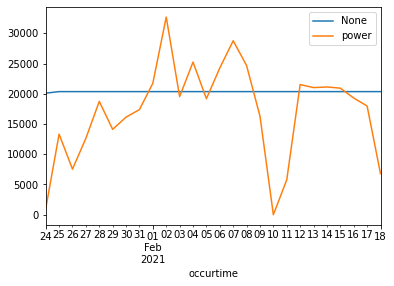

In [ ]:
pred.plot(legend=True)
test['power'].plot(legend=True)

In [ ]:
test['power'].mean()

17217.805

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['power']))
print(rmse)

8386.993556572834


In [ ]:
model2=ARIMA(df['power'],order=(0,0,1))
model2=model2.fit()
df.tail()

,power
occurtime,
2021-02-14,21124.72
2021-02-15,20928.51
2021-02-16,19299.25
2021-02-17,17978.39
2021-02-18,6791.59


In [ ]:
index_future_dates=pd.date_range(start='2021-02-18',end='2021-02-28')
pred=model2.predict(start=len(df),end=len(df)+10,typ='levels').rename('arima preds')
pred.index=index_future_dates

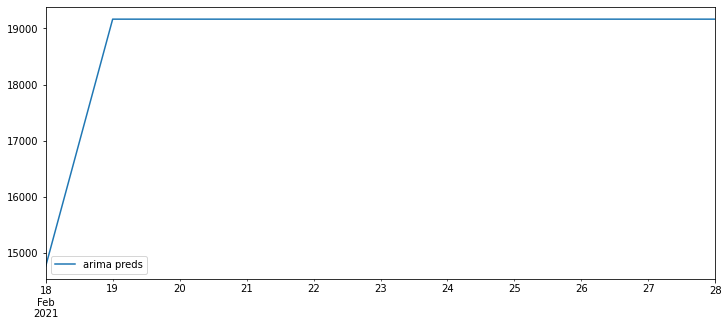

In [ ]:
pred.plot(figsize=(12,5),legend=True)